In [7]:
import os 
import cv2
import numpy as np 
from tqdm import tqdm 

In [20]:
REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    Cats = 'PetImages/Cat'
    Dogs = "PetImages/Dog"
    Labels = {Cats: 0, Dogs: 1}
    training_data = []
    catcount =0 
    dogcount = 0
    
    def make_training_data(self):
        for label in self.Labels:
            print(label)
            for f in tqdm(os.listdir(label)):
                
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.Labels[label]]])
                    if label == self.Cats:
                        self.catcount +=1 
                    elif label == self.Dogs:
                        self.dogcount +=1 
                        
                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)              


In [17]:
if REBUILD_DATA:
    dogvscats = DogsVSCats()
    dogvscats.make_training_data()

PetImages/Cat


100%|██████████████████████████████████████████████████████████████████████████| 12501/12501 [00:11<00:00, 1128.43it/s]


PetImages/Dog


100%|██████████████████████████████████████████████████████████████████████████| 12501/12501 [00:11<00:00, 1061.67it/s]


Cats: 12476
Dogs: 12470


In [19]:
train_data = np.load("training_data.npy", allow_pickle = True)

In [21]:
print(len(train_data))

24946


In [23]:
print(train_data[1])

[array([[188, 168, 117, ...,  48,  89, 111],
        [115,  70,  80, ...,  29, 107,  99],
        [157, 168, 120, ..., 110, 103,  82],
        ...,
        [ 58,  32,  41, ..., 226, 224, 195],
        [204, 179, 159, ..., 240, 208,  89],
        [187, 145, 145, ..., 146, 111,  95]], dtype=uint8) array([0., 1.])]


<function matplotlib.pyplot.show(close=None, block=None)>

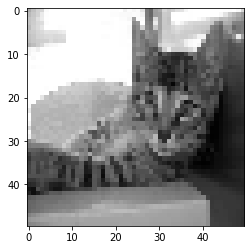

In [32]:
import matplotlib.pyplot as plt

plt.imshow(train_data[2][0], 
          cmap= "gray")
plt.show

In [33]:
train_data[2][1]

array([1., 0.])